In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
pd.options.display.max_columns = None

# Big cells

In [4]:
# Preprocessed data path
pp_path = '/home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_size_and_sum_all_wells/'
os.listdir(pp_path)

with open(os.path.join(pp_path, 'metadata.csv')) as file:
    metadata = pd.read_csv(file)
    # remove duplicated items (there are not duplicated items among different sets (train, val and test))
    metadata = metadata.groupby(['mapobject_id'], sort=False, as_index=False).first()

<AxesSubplot:ylabel='cell_size'>

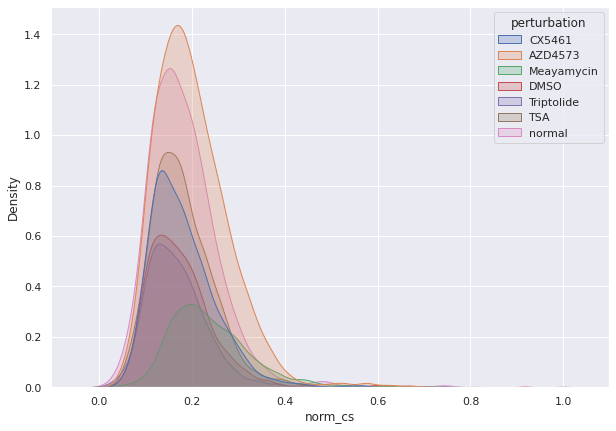

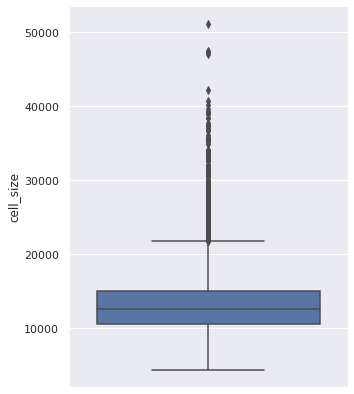

In [8]:
temp = metadata[['cell_size','perturbation']].copy()
temp['norm_cs'] = (temp.cell_size - temp.cell_size.min()) / (temp.cell_size.max() - temp.cell_size.min())
# Plot cell size distribution

plt.figure(figsize=(10,7))
sns.kdeplot(data=temp,
            x=temp.norm_cs,
            hue=temp.perturbation,
            bw_method=0.2,
            shade=True)

plt.figure(figsize=(5,7))
sns.boxplot(data=temp,
               y='cell_size')

In [17]:
mask = (metadata.cell_size > 45000)
metadata[['mapobject_id_cell', 'cell_cycle', 'set']][mask].set_index('mapobject_id_cell')

,cell_cycle,set
mapobject_id_cell,,
348383,G2,train
379178,G2,train
384769,G2,val
377484,G2,test


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


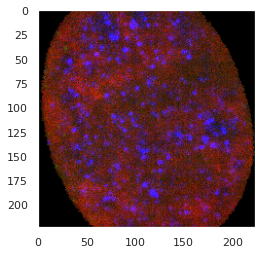

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


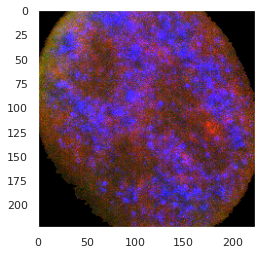

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


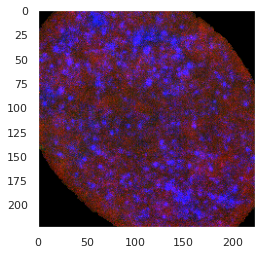

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


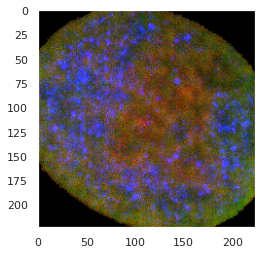

In [22]:
imgs_path = '/home/hhughes/Documents/Master_Thesis/Project/datasets/Outliers/'
cell_ids = metadata.mapobject_id_cell[mask].values

for cell_id in cell_ids:
    file = os.path.join(imgs_path, str(cell_id)+'.npz')
    cell = np.load(file)
    cell_img = cell['img']
    cell_mask = cell['mask']
    cell_targets = cell['targets']
    
    #plt.figure(figsize=(10,10))
    plt.imshow(cell_img[:,:,0:3],
                cmap=plt.cm.PiYG,
                vmin=0, vmax=1
              )
    plt.grid(False)
    plt.show()

# Small Cells

In [41]:
temp = metadata.sort_values(by='cell_size').head(4)[['mapobject_id_cell', 'cell_cycle', 'set']].copy()
temp.set_index('mapobject_id_cell')

,cell_cycle,set
mapobject_id_cell,,
379423,G1,train
315650,G1,train
301574,G1,train
202840,G1,test


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


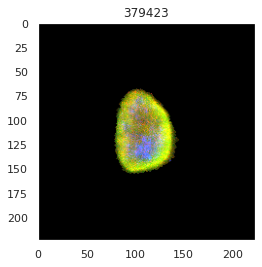

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


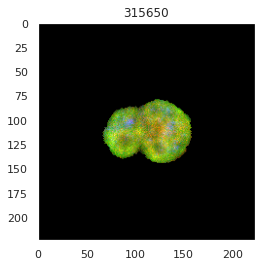

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


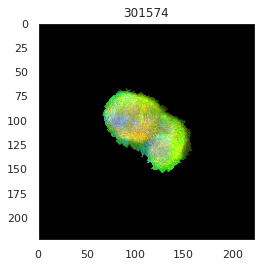

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


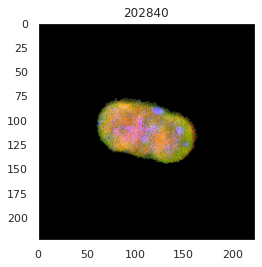

In [43]:
cell_ids = np.asarray(temp['mapobject_id_cell'])
imgs_path = '/home/hhughes/Documents/Master_Thesis/Project/datasets/Outliers/'

for cell_id in cell_ids:
    file = os.path.join(imgs_path, str(cell_id)+'.npz')
    cell = np.load(file)
    cell_img = cell['img']
    cell_mask = cell['mask']
    cell_targets = cell['targets']
    
    #plt.figure(figsize=(10,10))
    plt.imshow(cell_img[:,:,0:3],
                cmap=plt.cm.PiYG,
                vmin=0, vmax=1
              )
    plt.grid(False)
    plt.title(cell_id)
    plt.show()